## Direct file system access to the CEDA Archive ##

Read-only access to Group workspaces also possible as well as read/write to `/home`. Read/write access to GWSs may follow at a later date

In [11]:
%%time
!ls /neodc/esacci/sst/data/lt/Analysis/

L4
CPU times: user 5.67 ms, sys: 12.2 ms, total: 17.8 ms
Wall time: 1.1 s


Load a CCI SST dataset

In [5]:
%%time
import netCDF4
data=netCDF4.Dataset('/neodc/esacci/sst/data/lt/Analysis/L4/v01.1/1991/09/01/19910901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc')

CPU times: user 14.7 ms, sys: 2.55 ms, total: 17.2 ms
Wall time: 76.1 ms


## Prepare SST variable for plotting ##

In [44]:
%%time
lat = data['lat'][:]
lon = data['lon'][:]
var = data['analysed_sst'][0,:,:]

CPU times: user 722 ms, sys: 75.8 ms, total: 798 ms
Wall time: 1.18 s


Load plotting libraries - Cartopy in this case

In [47]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colorbar, colors


## Plot the SST data on world map ##

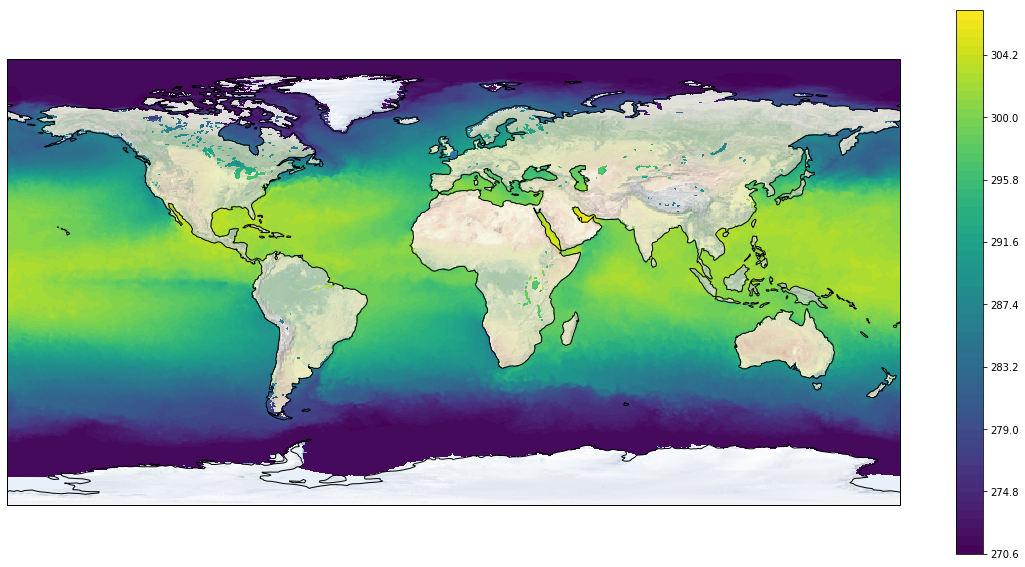

CPU times: user 23 s, sys: 1.07 s, total: 24.1 s
Wall time: 23.4 s


In [48]:
%%time
fig = plt.figure(figsize=(20, 10))
#plt.imshow(var,cmap='RdBu')
#cbar = colorbar.ColorbarBase(ax, cmap=plt.get_cmap('coolwarm')
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.contourf(lon, lat, var, 60, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar();
plt.show()

Alter the code as follows ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) can you how the map recentres on the pacific.  Next have a look at 
the following tutorial regarding selecting a colourmap https://matplotlib.org/1.4.1/users/colormaps.html . 
Alter the code plt.contourf(lon, lat, var, 60, transform=ccrs.PlateCarree(), cmap="RdBu") now chose diffrent colourmaps from the following list
https://matplotlib.org/1.4.1/users/colormaps.html#list-colormaps

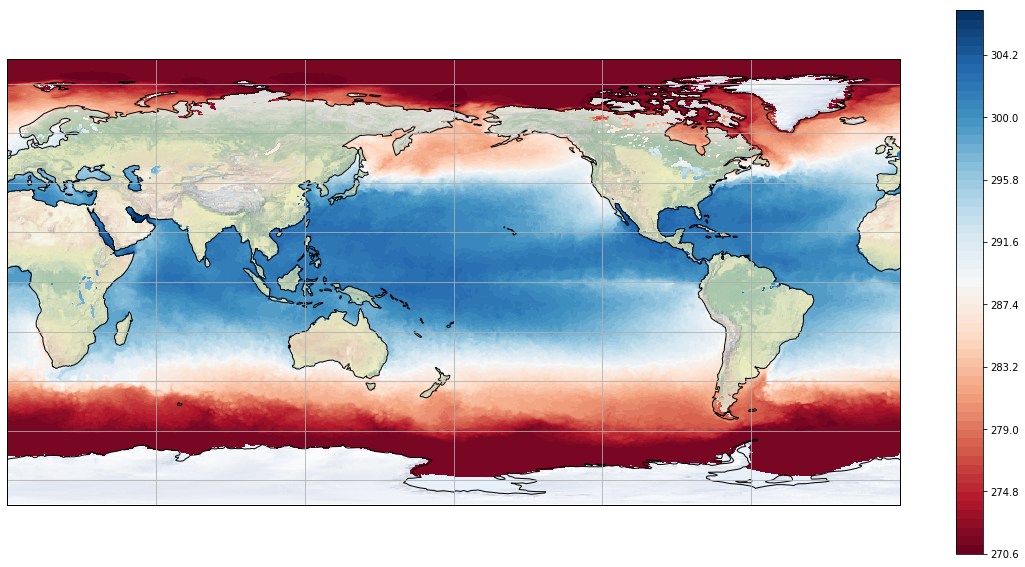

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.stock_img()
ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.contourf(lon, lat, var, 60, transform=ccrs.PlateCarree(), cmap="RdBu")
ax.coastlines(resolution='110m')
ax.gridlines()
plt.colorbar();
plt.show()